I will be making a prototype of a machine learning model to predict the amount of gold recovered from gold ore, as well as silver and lead. First thing I will do is import any libraries I deem necessary and take a look at the datasets from Zyfra.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

In [3]:
#load the datasets
gold_r_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_r_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_r_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [4]:
test_targets = gold_r_full.loc[gold_r_full.date.isin(gold_r_test.date), ['date','rougher.output.recovery', 'final.output.recovery']]
test_targets

,date,rougher.output.recovery,final.output.recovery
5521,2016-09-01 00:59:59,89.993421,70.273583
5522,2016-09-01 01:59:59,88.089657,68.910432
5523,2016-09-01 02:59:59,88.412756,68.143213
5524,2016-09-01 03:59:59,87.360133,67.776393
5525,2016-09-01 04:59:59,83.236367,61.467078
...,...,...,...
17204,2017-12-31 19:59:59,95.172585,68.919891
17205,2017-12-31 20:59:59,94.575036,68.440582
17206,2017-12-31 21:59:59,93.018138,67.092759
17207,2017-12-31 22:59:59,92.599042,68.061186


In [5]:
#begin looking through each dataset to learn more about the data
gold_r_train.info()
print("\n")
print(gold_r_train.isna().sum())
display(gold_r_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [6]:
gold_r_test.info()
print("\n")
print(gold_r_test.isna().sum())
display(gold_r_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [7]:
gold_r_full.info()
print("\n")
print(gold_r_full.isna().sum())
display(gold_r_full)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


I believe the best way to deal with the missing values within the data sets is to drop them. I will also create a function to determine the recovery.

In [8]:
def recovery(df, C, F, T):
    rec = 100 * ((df[C] * (df[F] - df[T])) / (df[F] * (df[C] - df[T])))
    return rec

Now I will use the training data to get the values for C, F, and T. With this, I'll be able to calculate the recovery and find the MAE between the calculations and feature values.

In [9]:
vals_pred = recovery(gold_r_train.dropna(subset=['rougher.output.recovery']), 'rougher.output.concentrate_au', 
                    'rougher.input.feed_au', 'rougher.output.tail_au')
vals_act = gold_r_train['rougher.output.recovery'].dropna().to_list()


In [10]:
mae = mean_absolute_error(vals_act, vals_pred)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  9.303415616264301e-15


Now I will analyze the features not available in the test set.

In [11]:
missing_features = set(gold_r_train.columns) - set(gold_r_test.columns)
print("Unavailable Features in the test set:", missing_features)

Unavailable Features in the test set: {'rougher.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.output.concentrate_ag', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'final.output.tail_ag', 'final.output.concentrate_au', 'final.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.concentrate_sol', 'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au', 'final.output.concentrate_ag', 'final.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'secondary_cleaner.output.tail_pb', 'final.output.tail_pb', 'primary_cleaner.output.tail_pb', 'final.output.concentrate_pb', 'rougher.output.tail_ag', 'primary_cleaner.output.concentrate_au', 'secondary_cleaner.output.tail_ag', 'rougher.output.recovery', 'rougher.output.tail_pb', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'primary_cleaner.output.concentrate_pb', 'rougher.output.tail_au', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_

I will make this output cleaner by showing the feature type, and then which feature is missing.

In [12]:
for missing_feature in missing_features:
    feature_parts = missing_feature.split('.')
    feature_type = feature_parts[1]
    print(f"Feature type: {feature_type}. Unavailable feature: {missing_feature}")

Feature type: output. Unavailable feature: rougher.output.tail_sol
Feature type: output. Unavailable feature: primary_cleaner.output.tail_au
Feature type: output. Unavailable feature: rougher.output.concentrate_ag
Feature type: output. Unavailable feature: primary_cleaner.output.tail_sol
Feature type: output. Unavailable feature: primary_cleaner.output.concentrate_ag
Feature type: output. Unavailable feature: final.output.tail_ag
Feature type: output. Unavailable feature: final.output.concentrate_au
Feature type: output. Unavailable feature: final.output.concentrate_sol
Feature type: output. Unavailable feature: primary_cleaner.output.tail_ag
Feature type: output. Unavailable feature: primary_cleaner.output.concentrate_sol
Feature type: output. Unavailable feature: secondary_cleaner.output.tail_sol
Feature type: output. Unavailable feature: secondary_cleaner.output.tail_au
Feature type: output. Unavailable feature: final.output.concentrate_ag
Feature type: output. Unavailable feature: 

A large amount of the features not available in the test set are output types with a few calculation types as well. The output types may be necessary to the model as it provides information about the end process of the gold refinery. The calculation types may not be as necessary for the model since they are providing information on reagent additions to certain float banks. 

I will now remove any missing values from the datasets to make working with the data easier.

In [13]:
gold_r_train = gold_r_train.dropna()
print(gold_r_train.isna().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64


In [14]:
gold_r_test = gold_r_test.dropna()
print(gold_r_test.isna().sum())

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [15]:
gold_r_full = gold_r_full.dropna()
print(gold_r_full.isna().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64


Now, I will begine to analyze the concentrations of metals. My first step in doing so will be to select the relevant columns in the training dataset.

In [16]:
metal_stages = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'final.output.concentrate_au',
                        'rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'final.output.concentrate_ag',
                        'rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'final.output.concentrate_pb']

metal_con = gold_r_train[metal_stages]

Now, I'll make a graph to show how the concentrations of metals will change in different stages for au, ag, and pb.

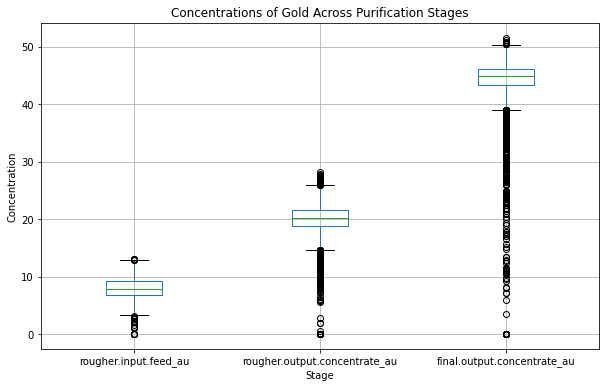

In [17]:
plt.figure(figsize=(10, 6))
metal_con.filter(like='_au').boxplot()
plt.title("Concentrations of Gold Across Purification Stages")
plt.xlabel("Stage")
plt.ylabel("Concentration")
plt.show()

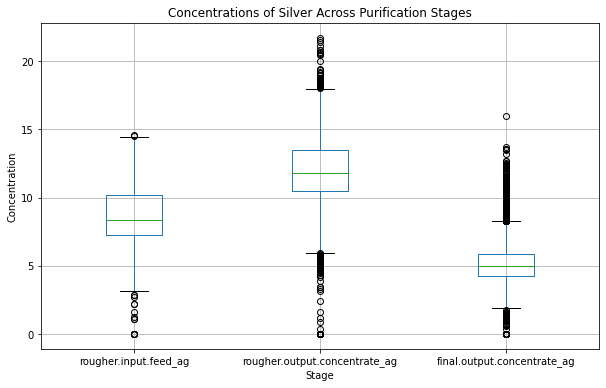

In [18]:
plt.figure(figsize=(10, 6))
metal_con.filter(like='_ag').boxplot()
plt.title("Concentrations of Silver Across Purification Stages")
plt.xlabel("Stage")
plt.ylabel("Concentration")
plt.show()

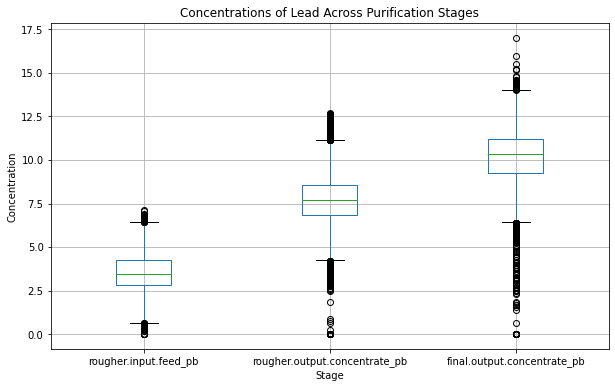

In [19]:
plt.figure(figsize=(10, 6))
metal_con.filter(like='_pb').boxplot()
plt.title("Concentrations of Lead Across Purification Stages")
plt.xlabel("Stage")
plt.ylabel("Concentration")
plt.show()

In [20]:
gold_trends_mean = metal_con.filter(like='_au').mean()
gold_trends_min = metal_con.filter(like='_au').min()
gold_trends_max = metal_con.filter(like='_au').max()
print("The mean concentration of gold across all stages:\n", gold_trends_mean)
print("\nThe min concentration of gold across all stages:\n", gold_trends_min)
print("\nThe max concentration of gold across all stages:\n", gold_trends_max)

The mean concentration of gold across all stages:
 rougher.input.feed_au             8.107739
rougher.output.concentrate_au    19.776788
final.output.concentrate_au      44.131636
dtype: float64

The min concentration of gold across all stages:
 rougher.input.feed_au            0.01
rougher.output.concentrate_au    0.00
final.output.concentrate_au      0.00
dtype: float64

The max concentration of gold across all stages:
 rougher.input.feed_au            13.126043
rougher.output.concentrate_au    28.146838
final.output.concentrate_au      51.571885
dtype: float64


In [21]:
silver_trends_mean = metal_con.filter(like='_ag').mean()
silver_trends_min = metal_con.filter(like='_ag').min()
silver_trends_max = metal_con.filter(like='_ag').max()
print("The mean concentration of silver across all stages:\n", silver_trends_mean)
print("\nThe min concentration of silver across all stages:\n", silver_trends_min)
print("\nThe max concentration of silver across all stages:\n", silver_trends_max)

The mean concentration of silver across all stages:
 rougher.input.feed_ag             8.773065
rougher.output.concentrate_ag    11.841982
final.output.concentrate_ag       5.156333
dtype: float64

The min concentration of silver across all stages:
 rougher.input.feed_ag            0.01
rougher.output.concentrate_ag    0.00
final.output.concentrate_ag      0.00
dtype: float64

The max concentration of silver across all stages:
 rougher.input.feed_ag            14.596026
rougher.output.concentrate_ag    21.725695
final.output.concentrate_ag      16.001945
dtype: float64


In [22]:
lead_trends_mean = metal_con.filter(like='_ag').mean()
lead_trends_min = metal_con.filter(like='_ag').min()
lead_trends_max = metal_con.filter(like='_ag').max()
print("The mean concentration of lead across all stages:\n", lead_trends_mean)
print("\nThe min concentration of lead across all stages:\n", lead_trends_min)
print("\nThe max concentration of lead across all stages:\n", lead_trends_max)

The mean concentration of lead across all stages:
 rougher.input.feed_ag             8.773065
rougher.output.concentrate_ag    11.841982
final.output.concentrate_ag       5.156333
dtype: float64

The min concentration of lead across all stages:
 rougher.input.feed_ag            0.01
rougher.output.concentrate_ag    0.00
final.output.concentrate_ag      0.00
dtype: float64

The max concentration of lead across all stages:
 rougher.input.feed_ag            14.596026
rougher.output.concentrate_ag    21.725695
final.output.concentrate_ag      16.001945
dtype: float64


Above shows the mean, minimum, and maximum concentration of the metals throughout all stages of the purification process. It helps to show, along with the boxplots, the change in concentration of metals in the process.
The boxplot shows gold and lead having a higher final.output.concentrate than their rougher.input.feed, which one would think should be the other way around. This could be due to the amount of missing values that were dropped to skew the boxplot this way. 
Silver ends up having a higher rougher.input.feed than its final.output.concentrate, which makes more sense with the metal extraction process.

Now, I'll compare the feed particle size distributions in the training and test sets. I'll make a histogram to visualize the distribution of feed particle sizes in the training and test sets.

In [23]:
columns_compared = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

particle_size_train = gold_r_train[columns_compared]
particle_size_test = gold_r_test[columns_compared]

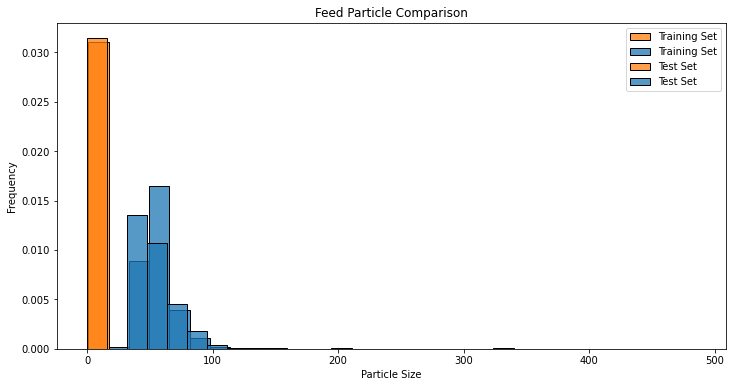

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(data=particle_size_train, bins=30, stat='density', label='Training Set')
sns.histplot(data=particle_size_test, bins=30, stat='density', label='Test Set')
plt.title('Feed Particle Comparison')
plt.xlabel('Particle Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [25]:
mean_size_train = particle_size_train.mean()
mean_size_test = particle_size_test.mean()

print("Mean Particle Size in Training Set:", mean_size_train)
print("\nMean Particle Size in Test Set:", mean_size_test)

Mean Particle Size in Training Set: rougher.input.feed_size            57.215128
primary_cleaner.input.feed_size     7.396036
dtype: float64

Mean Particle Size in Test Set: rougher.input.feed_size            56.338644
primary_cleaner.input.feed_size     7.268670
dtype: float64


The histogram above shows that the training set and testing set are very close in values. It is reaffirmed through the code below showing that the mean particle size distribution for the training and testing sets are extremely close in value.

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

I see, the new reading makes more sense :)

</div>

Now I will analyze the total concentrations of all substances and to do this, I'll need to calculate them first.

In [26]:
gold_r_train['total_raw'] = (gold_r_train['rougher.input.feed_au'] + gold_r_train['rougher.input.feed_ag'] + 
                             gold_r_train['rougher.input.feed_pb'])
gold_r_train['total_rougher'] = (gold_r_train['rougher.output.concentrate_au'] + gold_r_train['rougher.output.concentrate_ag']
                                + gold_r_train['rougher.output.concentrate_pb'])
gold_r_train['total_final'] = (gold_r_train['final.output.concentrate_au'] + gold_r_train['final.output.concentrate_ag']
                              + gold_r_train['final.output.concentrate_pb'])

<function matplotlib.pyplot.show(close=None, block=None)>

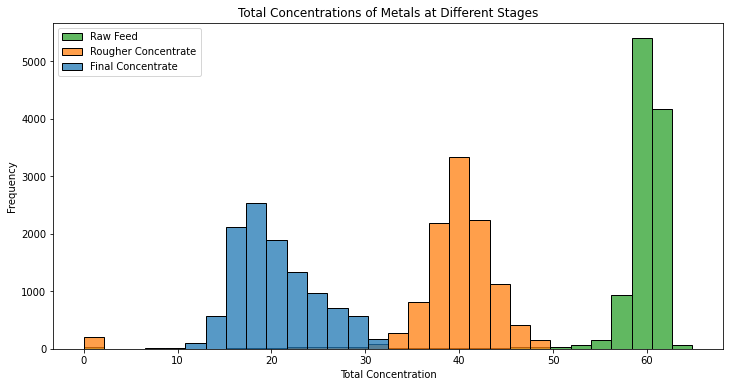

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(data=gold_r_train[['total_raw', 'total_rougher', 'total_final']], bins=30)
plt.title('Total Concentrations of Metals at Different Stages')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.legend(['Raw Feed', 'Rougher Concentrate', 'Final Concentrate'])
plt.show

From the graph, we can see this is what can be expected of the refinement process. The raw material is refined until the total concentration is less, but the overall quality is greater. The only abnormal values shown are within the Rougher Concentrate section and the values may not even be necessary in removing since they amount to a very small portion of the data.

Now I will create a function to calculate the final sMAPE value. 

In [28]:
def smape(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    smape = (np.sum(numerator / denominator) / len(y_true)) * 100
    return smape

With the sMAPE function created, I will train a few different models and evaluate them using cross-validation. The best model will then be tested with the test set and the sMAPE function.

In [29]:
features = gold_r_train.drop(['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
                             'date'],
                            axis=1)
target = gold_r_train['final.output.recovery']

In [30]:
features

,final.output.concentrate_sol,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,total_raw,total_rougher,total_final
0,5.507324,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,14.871440,38.395653,58.137072
1,5.257781,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,14.905729,38.945647,58.699942
2,5.383759,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,11.316280,7.25,0.991265,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,14.638299,38.649756,58.927421
3,4.858634,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,11.322140,7.25,0.996739,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,14.199305,38.411473,58.714815
4,4.939416,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,11.913613,7.25,1.009869,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,13.511497,38.867359,59.065251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,6.803482,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,8.028927,6.50,1.304232,...,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,16.045275,40.712449,61.295107
16856,6.862249,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,7.962636,6.50,1.302419,...,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,15.104931,40.755632,61.412113
16857,6.886013,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,7.955111,6.50,1.315926,...,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,14.515579,32.589863,61.340054
16858,6.799433,65.523246,8.777171,2.819214,10.463847,1.602879,98.880538,7.984164,6.50,1.241969,...,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,14.313448,40.148948,61.401016


In [31]:
test_features = gold_r_test.drop(['date'], axis=1)
train_features = gold_r_train[test_features.columns]

target_rougher = gold_r_train['rougher.output.recovery']
target_final = gold_r_train['final.output.recovery']

In [32]:
lr_model = LinearRegression()

rougher_scores = cross_val_score(lr_model, train_features, target_rougher, cv=5, scoring='neg_mean_absolute_error')
rougher_mae = -rougher_scores.mean()

final_scores = cross_val_score(lr_model, train_features, target_final, cv=5, scoring='neg_mean_absolute_error')
final_mae = -final_scores.mean()

print("Cross-Validation MAE for rougher.output.recovery:", rougher_mae)
print("Cross-Validation MAE for final.output.recovery:", final_mae)

Cross-Validation MAE for rougher.output.recovery: 8.382259435364906
Cross-Validation MAE for final.output.recovery: 6.203681189148012


In [33]:
rf_model = RandomForestRegressor(max_depth=3, n_estimators=30)

rougher_scores1 = cross_val_score(rf_model, train_features, target_rougher, cv=5, verbose=10, scoring='neg_mean_absolute_error')
rougher_mae1 = -rougher_scores1.mean()

final_scores1 = cross_val_score(rf_model, train_features, target_final, cv=5, scoring='neg_mean_absolute_error')
final_mae1 = -final_scores1.mean()

print("Cross-Validation MAE for rougher.output.recovery:", rougher_mae1)
print("Cross-Validation MAE for final.output.recovery:", final_mae1)

[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-6.562) total time=   4.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV] END ............................... score: (test=-5.786) total time=   4.0s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.1s remaining:    0.0s


[CV] END ............................... score: (test=-5.374) total time=   3.8s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.9s remaining:    0.0s


[CV] END ............................... score: (test=-9.305) total time=   3.7s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.6s remaining:    0.0s


[CV] END ............................... score: (test=-7.809) total time=   3.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.4s finished


Cross-Validation MAE for rougher.output.recovery: 6.967127064021729
Cross-Validation MAE for final.output.recovery: 6.152873648348942


In [34]:
rougher_pred_cv = cross_val_predict(lr_model, train_features, target_rougher, cv=5)
final_pred_cv = cross_val_predict(lr_model, train_features, target_final, cv=5)

rougher_smape_cv = smape(target_rougher, rougher_pred_cv)
final_smape_cv = smape(target_final, final_pred_cv)

final_smape = 0.25 * rougher_smape_cv + 0.75 * final_smape_cv

print("Cross-Validation sMAPE for rougher.output.recovery:", rougher_smape_cv)
print("Cross-Validation sMAPE for final.output.recovery:", final_smape_cv)
print("Final weighted sMAPE:", final_smape)

Cross-Validation sMAPE for rougher.output.recovery: 11.925012237893956
Cross-Validation sMAPE for final.output.recovery: 9.746147057275707
Final weighted sMAPE: 10.290863352430268


In [35]:
rougher_pred_cv1 = cross_val_predict(rf_model, train_features, target_rougher, cv=5)
final_pred_cv1 = cross_val_predict(rf_model, train_features, target_final, cv=5)

rougher_smape_cv1 = smape(target_rougher, rougher_pred_cv1)
final_smape_cv1 = smape(target_final, final_pred_cv1)

final_smape1 = 0.25 * rougher_smape_cv1 + 0.75 * final_smape_cv1

print("Cross-Validation sMAPE for rougher.output.recovery:", rougher_smape_cv1)
print("Cross-Validation sMAPE for final.output.recovery:", final_smape_cv1)
print("Final weighted sMAPE:", final_smape1)

Cross-Validation sMAPE for rougher.output.recovery: 10.405453520670488
Cross-Validation sMAPE for final.output.recovery: 9.852808806953558
Final weighted sMAPE: 9.99096998538279


Based on the sMAPE values, the Random Forest Regressor model has a lower sMAPE value which suggests that this model will provide more accurate predictions.

In [36]:
test_targets = gold_r_full.loc[gold_r_full.date.isin(gold_r_test.date), ['rougher.output.recovery', 'final.output.recovery']]
test_target_rougher = test_targets['rougher.output.recovery']
test_target_final = test_targets['final.output.recovery']

test_features = gold_r_test.loc[gold_r_test.date.isin(gold_r_full.loc[gold_r_full.date.isin(gold_r_test.date)].date)]
test_features = test_features[train_features.columns]

In [37]:
test_features.shape

(5077, 52)

In [38]:
test_targets.shape

(5077, 2)

In [39]:
dummy_regressor_rougher = DummyRegressor(strategy='mean')

dummy_regressor_rougher.fit(train_features, target_rougher)
dummy_predict_rougher = dummy_regressor_rougher.predict(test_features)
smape_baseline = smape(test_target_rougher, dummy_predict_rougher)

In [40]:
test_features_filtered = gold_r_full[gold_r_test.columns]

lr_model.fit(train_features, target_rougher)
lr_predictions_rougher = lr_model.predict(test_features)
lr_smape_rougher = smape(test_target_rougher, lr_predictions_rougher)

smape_weighted = 0.25 * smape_baseline + 0.75 * lr_smape_rougher

In [41]:
print("Linear Regression sMAPE on Rougher Test Set:", lr_smape_rougher)
print("Baseline sMAPE on Rougher Test Set:", smape_baseline)
print("Weighted sMAPE for Baseline Model:", smape_weighted)

Linear Regression sMAPE on Rougher Test Set: 10.219615192835978
Baseline sMAPE on Rougher Test Set: 10.23453334491487
Weighted sMAPE for Baseline Model: 10.2233447308557
